In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + city
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | dingle
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | grimari
City not found. Skipping...
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | sampit
Processing Record 9 of Set 1 | sao filipe
Processing Record 10 of Set 1 | port hardy
Processing Record 11 of Set 1 | pitimbu
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | mataram
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | kahului
Processing Record 17 of Set 1 | acarau
Processing Record 18 of Set 1 | boende
Processing Record 19 of Set 1 | kaduqli
Processing Record 20 of Set 1 | buala
Processing Record 21 of Set 1 | jati
Processing Record 22 of Set 1 | hvide sande
Processing Record 23 of Set 1 | hithadhoo
Processing Record 24 of Set 1 | hasaki
Processing Record 25

Processing Record 39 of Set 4 | bubaque
Processing Record 40 of Set 4 | tepalcatepec
Processing Record 41 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 42 of Set 4 | tiznit
Processing Record 43 of Set 4 | bengkulu
Processing Record 44 of Set 4 | asau
Processing Record 45 of Set 4 | saskylakh
Processing Record 46 of Set 4 | tarakan
Processing Record 47 of Set 4 | whitehorse
Processing Record 48 of Set 4 | jablanica
Processing Record 49 of Set 4 | wolbrom
Processing Record 50 of Set 4 | marcona
City not found. Skipping...
Processing Record 1 of Set 5 | east london
Processing Record 2 of Set 5 | trairi
Processing Record 3 of Set 5 | beidao
Processing Record 4 of Set 5 | jiwani
Processing Record 5 of Set 5 | kilindoni
Processing Record 6 of Set 5 | turukhansk
Processing Record 7 of Set 5 | beringovskiy
Processing Record 8 of Set 5 | alexandria
Processing Record 9 of Set 5 | brawley
Processing Record 10 of Set 5 | hangu
Processing Record 11 of Set 5 | husavik
Proces

Processing Record 26 of Set 8 | mathbaria
Processing Record 27 of Set 8 | xining
Processing Record 28 of Set 8 | kitimat
Processing Record 29 of Set 8 | kalabo
Processing Record 30 of Set 8 | ndende
Processing Record 31 of Set 8 | kanigoro
Processing Record 32 of Set 8 | krasnyy oktyabr
Processing Record 33 of Set 8 | bellevue
Processing Record 34 of Set 8 | vostok
Processing Record 35 of Set 8 | macaboboni
City not found. Skipping...
Processing Record 36 of Set 8 | mecca
Processing Record 37 of Set 8 | vila franca do campo
Processing Record 38 of Set 8 | tyup
Processing Record 39 of Set 8 | artyk
City not found. Skipping...
Processing Record 40 of Set 8 | chimoio
Processing Record 41 of Set 8 | jalu
Processing Record 42 of Set 8 | tabou
Processing Record 43 of Set 8 | doctor pedro p. pena
City not found. Skipping...
Processing Record 44 of Set 8 | touros
Processing Record 45 of Set 8 | broome
Processing Record 46 of Set 8 | amapa
Processing Record 47 of Set 8 | mandan
Processing Recor

Processing Record 11 of Set 12 | kosh-agach
Processing Record 12 of Set 12 | gao
Processing Record 13 of Set 12 | zyukayka
Processing Record 14 of Set 12 | kokkola
Processing Record 15 of Set 12 | one hundred mile house
City not found. Skipping...
Processing Record 16 of Set 12 | jorhat
Processing Record 17 of Set 12 | naze
Processing Record 18 of Set 12 | nizhneangarsk
Processing Record 19 of Set 12 | marsaxlokk
Processing Record 20 of Set 12 | qusar
Processing Record 21 of Set 12 | senneterre
Processing Record 22 of Set 12 | hauterive
Processing Record 23 of Set 12 | ewo
Processing Record 24 of Set 12 | praia
Processing Record 25 of Set 12 | talcahuano
Processing Record 26 of Set 12 | raga
Processing Record 27 of Set 12 | yarega
Processing Record 28 of Set 12 | meyungs
City not found. Skipping...
Processing Record 29 of Set 12 | carballo
Processing Record 30 of Set 12 | verkhoyansk
Processing Record 31 of Set 12 | quatre cocos
Processing Record 32 of Set 12 | djibo
Processing Record 

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dingle,10.9995,122.6711,75.51,94,100,4.74,PH,2021-10-19 21:04:29
1,Busselton,-33.6500,115.3333,54.09,63,100,20.42,AU,2021-10-19 21:04:30
2,Ushuaia,-54.8000,-68.3000,55.78,69,100,9.40,AR,2021-10-19 21:02:13
3,Albany,42.6001,-73.9662,63.45,52,13,1.99,US,2021-10-19 21:02:28
4,Mataura,-46.1927,168.8643,49.05,56,85,4.05,NZ,2021-10-19 21:04:30
5,Castro,-24.7911,-50.0119,53.51,98,100,8.79,BR,2021-10-19 21:01:11
6,Sampit,-2.5333,112.9500,73.09,99,73,1.52,ID,2021-10-19 21:04:31
7,Sao Filipe,14.8961,-24.4956,80.42,71,1,2.26,CV,2021-10-19 21:04:31
8,Port Hardy,50.6996,-127.4199,53.69,67,100,19.64,CA,2021-10-19 21:03:16
9,Pitimbu,-7.4706,-34.8086,81.19,80,61,12.57,BR,2021-10-19 21:04:31


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dingle,PH,2021-10-19 21:04:29,10.9995,122.6711,75.51,94,100,4.74
1,Busselton,AU,2021-10-19 21:04:30,-33.6500,115.3333,54.09,63,100,20.42
2,Ushuaia,AR,2021-10-19 21:02:13,-54.8000,-68.3000,55.78,69,100,9.40
3,Albany,US,2021-10-19 21:02:28,42.6001,-73.9662,63.45,52,13,1.99
4,Mataura,NZ,2021-10-19 21:04:30,-46.1927,168.8643,49.05,56,85,4.05
...,...,...,...,...,...,...,...,...,...
551,Koungou,YT,2021-10-19 21:07:33,-12.7336,45.2042,74.91,88,0,2.30
552,Faranah,GN,2021-10-19 21:03:06,10.0404,-10.7434,72.16,93,62,5.37
553,Smithers,CA,2021-10-19 21:07:33,54.7804,-127.1743,44.22,61,100,3.62
554,Bronnoysund,NO,2021-10-19 21:03:10,65.4625,12.1997,42.80,84,75,18.41


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

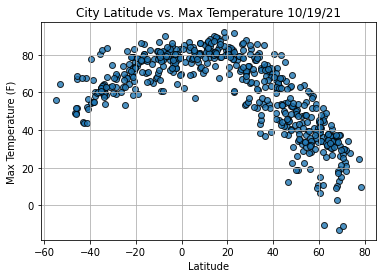

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

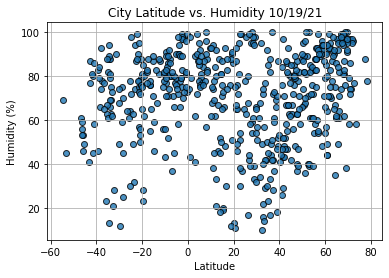

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

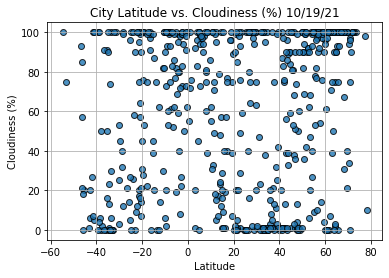

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

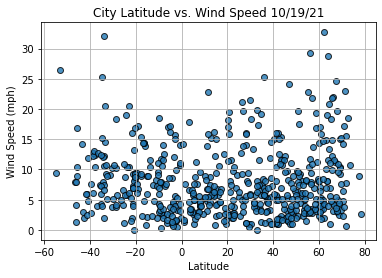

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [56]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [57]:
index13 = city_data_df.loc[13]
index13

City                       Dikson
Country                        RU
Date          2021-10-19 21:04:33
Lat                       73.5069
Lng                       80.5464
Max Temp                    27.97
Humidity                       58
Cloudiness                    100
Wind Speed                  10.76
Name: 13, dtype: object

In [58]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dingle,PH,2021-10-19 21:04:29,10.9995,122.6711,75.51,94,100,4.74
3,Albany,US,2021-10-19 21:02:28,42.6001,-73.9662,63.45,52,13,1.99
7,Sao Filipe,CV,2021-10-19 21:04:31,14.8961,-24.4956,80.42,71,1,2.26
8,Port Hardy,CA,2021-10-19 21:03:16,50.6996,-127.4199,53.69,67,100,19.64
10,Tasiilaq,GL,2021-10-19 21:04:32,65.6145,-37.6368,30.36,49,0,4.45


In [59]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

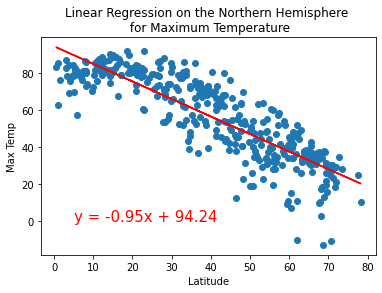

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,0))

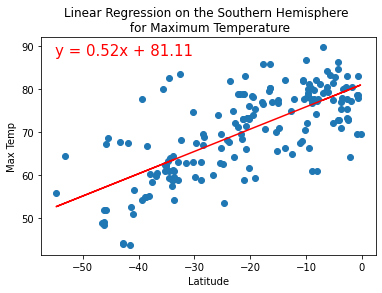

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,88))



In [75]:
from scipy import stats

# r-value and p-value for Southern Hemisphere
stats.pearsonr(southern_hemi_df['Max Temp'], southern_hemi_df['Lat'])


(0.7141710427530095, 3.1654155608685815e-29)

In [76]:
# r-value and p-value for Northern Hemisphere
stats.pearsonr(northern_hemi_df['Max Temp'], northern_hemi_df['Lat'])

(-0.8554070043484396, 3.4833699804964276e-109)

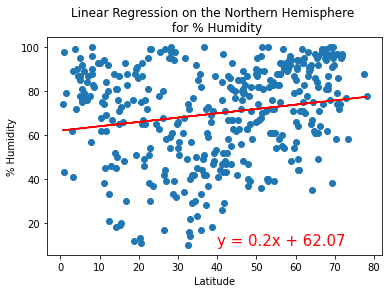

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

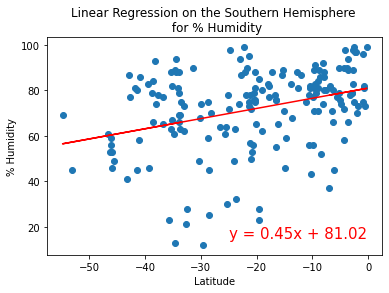

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-25,15))

In [86]:
# r-value and p-value for Southern Hemisphere
stats.pearsonr(southern_hemi_df['Humidity'], southern_hemi_df['Lat'])

(0.33761586718228953, 3.804579027528982e-06)

In [88]:
# r-value and p-value for Northern Hemisphere
stats.pearsonr(northern_hemi_df['Humidity'], northern_hemi_df['Lat'])

(0.18226224866889396, 0.00037514355199923715)

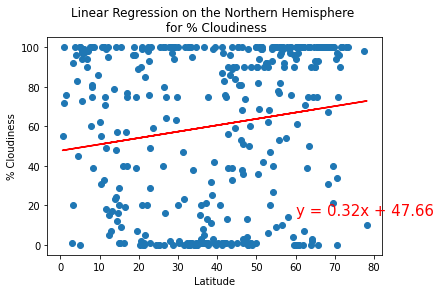

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(60,15))

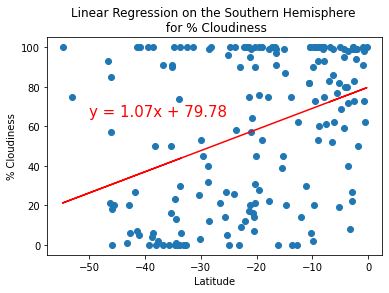

In [97]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,65))

In [99]:
# r-value and p-value for Northern Hemisphere
stats.pearsonr(northern_hemi_df['Cloudiness'], northern_hemi_df['Lat'])

(0.16163805734539277, 0.001639693967874344)

In [100]:
# r-value and p-value for Southern Hemisphere
stats.pearsonr(southern_hemi_df['Cloudiness'], southern_hemi_df['Lat'])

(0.3764191533391028, 2.067674258859857e-07)

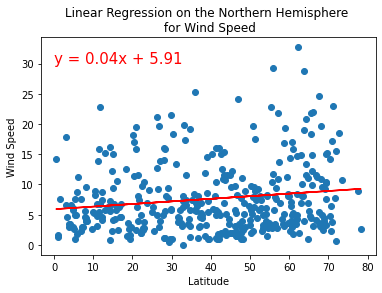

In [103]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,30))

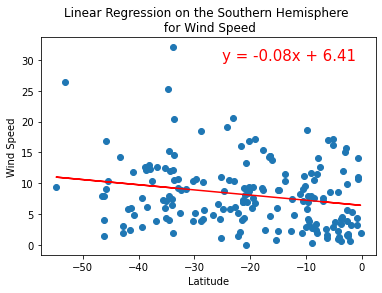

In [108]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-25,30))

In [109]:
# r-value and p-value for Northern Hemisphere
stats.pearsonr(northern_hemi_df['Wind Speed'], northern_hemi_df['Lat'])

(0.15243375302506737, 0.003004680516455963)

In [110]:
# r-value and p-value for Southern Hemisphere
stats.pearsonr(southern_hemi_df['Wind Speed'], southern_hemi_df['Lat'])

(-0.21316696367062893, 0.004170046805534521)